# Chaines de Markov

**Librairies**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

### Définition

Soit $(X_n)_{n \in \mathbb{N}}$ une suite de variables aléatoires réelles **discrètes**, toutes à valeurs dans le même ensemble d'états $E$ (fini ou dénombrable).

On dit que $(X_n)_{n \in \mathbb{N}}$ est une **chaîne de Markov** si, pour tout $n \in \mathbb{N}$, la loi de $X_{n+1}$ **ne dépend que de $X_n$** (et pas des états antérieurs).

Formellement :

$$
\forall (i_0, i_1, \dots, i_n, i_{n+1}) \in E^{n+2}, \quad
\mathbb{P}(X_{n+1} = i_{n+1} \mid X_0 = i_0, \dots, X_n = i_n)
= \mathbb{P}(X_{n+1} = i_{n+1} \mid X_n = i_n)
$$

**Cas particulier** : chaîne de Markov homogène

On dit que la chaîne est **homogène** lorsque la loi de transition **ne dépend pas de $n$**, c’est-à-dire que la **probabilité de transition d’un état à un autre reste la même à tout instant**.

Formellement :

$$
\forall (i, j) \in E^2, \quad
\mathbb{P}(X_{n+1} = j \mid X_n = i) = \mathbb{P}(X_1 = j \mid X_0 = i)
$$


**Interprétation intuitive**

> "Le futur (état $n+1$) **ne dépend que du présent** (état $n$), **pas du passé** (états 0 à $n-1$)"

Les éléments de $E$ sont appelés les **états** de la chaîne.


**En résumé**

* La **chaîne de Markov** ne "regarde" que le présent pour évoluer.
* Une **chaîne homogène** a des **règles fixes de transition**, indépendantes du temps.
* On numérote souvent les états comme $E = \{1, 2, \dots, q\}$.



On considère, **pour la suite**, une chaîne de Markov $(X_n)_{n \in \mathbb{N}}$ **homogène**, à valeurs dans un **espace d'états fini** $E = \{1, 2, \dots, q\}$.


**Matrice de transition et loi initiale**

* La **matrice de transition** $P = (p_{ij}) \in \mathcal{M}_q(\mathbb{R})$ est définie par :

$$
\forall (i, j) \in E^2,\quad p_{ij} = \mathbb{P}(X_{1} = j \mid X_{0} = i)
$$

* La **loi de $X_n$** est décrite par un **vecteur ligne** $\mu_n = (\mu_n(1), \dots, \mu_n(q))$, où :

$$
\mu_n(i) = \mathbb{P}(X_n = i)
$$


**Évolution des lois**

* Par la formule des probabilités totales :

$$
\forall n \in \mathbb{N},\quad \mu_{n+1} = \mu_n \times P
$$

* Par récurrence :

$$
\mu_n = \mu_0 \times P^n
$$

Donc toute la suite $(\mu_n)$ est **déterminée** par :

* La **matrice de transition** $P$
* Le **vecteur initial** $\mu_0$


**Vecteur stochastique**

Un vecteur ligne $\mu \in \mathbb{R}^q$ est **stochastique** si :

* Tous ses coefficients sont $\geq 0$,
* Leur **somme vaut 1**.

Une matrice $P$ est **stochastique** si :

* Tous ses coefficients sont $\geq 0$,
* Chaque **ligne** somme à 1.


In [ ]:
# Espace d'états : E = {1, 2, 3}
# Matrice de transition P (3x3)
P = np.array([
    [0.5, 0.4, 0.1],
    [0.2, 0.5, 0.3],
    [0.0, 0.3, 0.7]
])

# Vecteur ligne initial (loi de X0) — doit être stochastique
mu_0 = np.array([1.0, 0.0, 0.0])  # certain de commencer en état 1

# Nombre d'étapes
n_steps = 10

# Calcul des lois successives mu_n = mu_0 @ P^n
mu = mu_0.copy()
for n in range(1, n_steps + 1):
    mu = np.dot(mu, P) # ou mu @ P
    print(f"Étape {n} : μ_{n} = {mu.round(4)}")

Étape 1 : μ_1 = [0.2333 0.4    0.3667]
Étape 2 : μ_2 = [0.1967 0.4033 0.4   ]
Étape 3 : μ_3 = [0.179  0.4003 0.4207]
Étape 4 : μ_4 = [0.1696 0.398  0.4325]
Étape 5 : μ_5 = [0.1644 0.3965 0.4391]
Étape 6 : μ_6 = [0.1615 0.3957 0.4428]
Étape 7 : μ_7 = [0.1599 0.3953 0.4448]
Étape 8 : μ_8 = [0.159  0.395  0.4459]
Étape 9 : μ_9 = [0.1585 0.3949 0.4466]
Étape 10 : μ_10 = [0.1582 0.3948 0.4469]


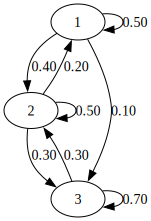

In [ ]:
# Matrice de transition P
P = np.array([
    # 1   #2   #3
    [0.5, 0.4, 0.1], # 1
    [0.2, 0.5, 0.3], # 2
    [0.0, 0.3, 0.7]  # 3
])

states = ['1', '2', '3']  # noms des états


dot = Digraph()

# Ajouter les sommets (états)
for s in states:
    dot.node(s)

# Ajouter les arcs avec les probabilités
for i in range(len(P)):
    for j in range(len(P)):
        prob = P[i][j]
        if prob > 0:
            dot.edge(states[i], states[j], label=f"{prob:.2f}")

dot

**Modèle : marche aléatoire semi-réfléchie**

* **États** : $1, 2, \dots, N$
* **Comportement** :

  * Si $1 < i < N$ : déplacement à gauche ou à droite (probabilité ½)
  * Si $i = 1$ ou $i = N$ : reste sur place ou va vers le seul voisin (½)



[[0.5 0.5 0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.5 0.5]]
Étape 0 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 1 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 2 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 3 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 4 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 5 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 6 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 7 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 8 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 9 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 10 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 11 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 12 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 13 : mu = [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Étape 1

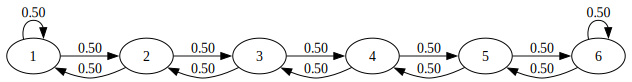

In [ ]:
N = 6 # Etat: {1, 2, 3, 4, 5, 6}

P = np.zeros((N, N))

for i in range(N):
    if i == 0:
        P[i, i] = 0.5
        P[i, i + 1] = 0.5
    elif i == N - 1:
        P[i, i] = 0.5
        P[i, i - 1] = 0.5
    else:
        P[i, i - 1] = 0.5
        P[i, i + 1] = 0.5
        
print(P)

mu_0 = np.ones(N) / N

n_steps = 15
mu = mu_0.copy()
print(f"Étape 0 : mu = {mu.round(4)}")

for step in range(1, n_steps + 1):
    mu = mu @ P
    print(f"Étape {step} : mu = {mu.round(4)}")

dot = Digraph()

dot.attr(rankdir='LR')

states = [str(i+1) for i in range(N)]

for s in states:
    dot.node(s)

for i in range(N):
    for j in range(N):
        if P[i, j] > 0:
            dot.edge(str(i+1), str(j+1), label=f"{P[i, j]:.2f}")

dot


### Loi stationnaire

Remarquons que si la suite de variables $(X_n)_{n \in \mathbb{N}}$ converge en loi vers une variable aléatoire $Y$, cela signifie que chaque composante du vecteur $\mu_n$ converge, lorsque $n \to +\infty$, vers un vecteur $\pi$, représentant la loi de la variable $Y$.

À partir de la formule de récurrence :

$$
\forall n \in \mathbb{N},\quad \mu_{n+1} = \mu_n \times P
$$

on obtient à la limite :

$$
\pi = \pi \times P
$$

**Définition : loi stationnaire**

On appelle **loi stationnaire** de la chaîne de Markov $(X_n)_{n \in \mathbb{N}}$ tout **vecteur stochastique** $\pi$ qui vérifie :

$$
\pi = \pi \times P
$$

Sous de bonnes hypothèses sur la chaîne, cette loi stationnaire est **unique**.

**Interprétation**

Le mot "stationnaire" signifie que si on initialise la chaîne avec la loi $\pi$, c’est-à-dire que $X_0 \sim \pi$, alors :

$$
X_1 \sim \pi,\quad X_2 \sim \pi,\quad \ldots,\quad X_n \sim \pi
$$

C’est ce qu’on appelle un **régime stationnaire**. Ce phénomène est dû au fait que :

$$
\mu_0 = \pi \Rightarrow \mu_1 = \mu_0 P = \pi P = \pi
\Rightarrow \mu_2 = \pi P = \pi,\quad \ldots
$$

**Résultats empiriques importants**

Sous certaines conditions :

1. **Fréquence d’occupation** :

$$
\frac{1}{n} \sum_{k=1}^{n} \mathbf{1}_{\{X_k = i\}} \xrightarrow[n \to \infty]{p.s.} \pi(i)
$$

Cela signifie que la **fréquence** à laquelle la chaîne est en état $i$ converge vers la valeur $\pi(i)$ (théorème ergodique).


2. **Convergence en loi (forte)** :

$$
\forall i \in E, \quad \lim_{n \to \infty} \mu_n(i) = \pi(i)
$$

Autrement dit, $(X_n)$ converge **en loi** vers une variable $Y \sim \pi$, quelle que soit la loi initiale $\mu_0$. Cela implique aussi :

$$
\lim_{n \to \infty} \mu_0 P^n = \pi
$$

---

**Remarque cruciale**

> **Les résultats ci-dessus sont vrais indépendamment de la loi initiale** (si la chaîne vérifie les hypothèses nécessaires : irréductibilité, apériodicité, etc.). on supposera qu’on a fait de bonnes hypothèses sur la chaîne qui assurent l’existence et l’unicité de la loi stationnaire.

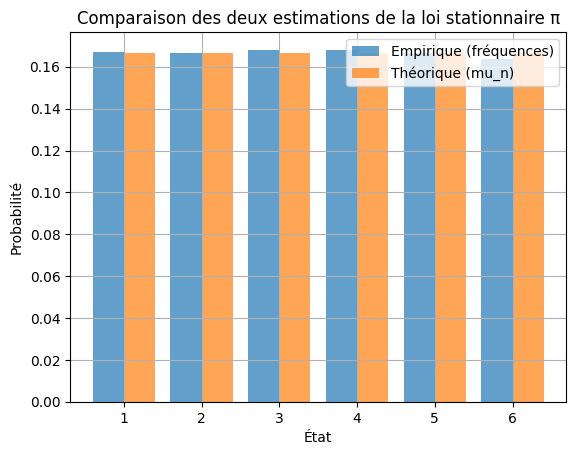


État | Empirique | Théorique
----------------------------
   1 |    0.1670 |    0.1667
   2 |    0.1668 |    0.1667
   3 |    0.1679 |    0.1667
   4 |    0.1681 |    0.1667
   5 |    0.1664 |    0.1667
   6 |    0.1638 |    0.1667


In [12]:
# On reprend l'exemple précédent
# Nombre d'états
N = 6

# Matrice de transition
P = np.zeros((N, N))
for i in range(N):
    if i == 0:
        P[i, i] = 0.5
        P[i, i + 1] = 0.5
    elif i == N - 1:
        P[i, i] = 0.5
        P[i, i - 1] = 0.5
    else:
        P[i, i - 1] = 0.5
        P[i, i + 1] = 0.5

# --- Méthode 1 : Estimation empirique par simulation d'une trajectoire ---
n_steps = 100_000
current_state = np.random.randint(0, N)
visits = np.zeros(N)

for _ in range(n_steps):
    visits[current_state] += 1
    current_state = np.random.choice(N, p=P[current_state])

pi_empirical = visits / n_steps

# --- Méthode 2 : Estimation par convergence du vecteur mu_n ---
mu = np.ones(N) / N  # loi initiale uniforme
for _ in range(100_000):
    mu = mu @ P # @ = np.dot

pi_theoretical = mu

# --- Affichage comparé ---
states = np.arange(1, N + 1)

plt.bar(states - 0.2, pi_empirical, width=0.4, label="Empirique (fréquences)", alpha=0.7)
plt.bar(states + 0.2, pi_theoretical, width=0.4, label="Théorique (mu_n)", alpha=0.7)
plt.title("Comparaison des deux estimations de la loi stationnaire π")
plt.xlabel("État")
plt.ylabel("Probabilité")
plt.xticks(states)
plt.legend()
plt.grid(True)
plt.show()

# Affichage texte
print("\nÉtat | Empirique | Théorique")
print("----------------------------")
for i in range(N):
    print(f"{i+1:4d} | {pi_empirical[i]:9.4f} | {pi_theoretical[i]:9.4f}")